In [13]:
# python libraries
import matplotlib.pyplot as plt
import numpy as np

# pydrake imports
from pydrake.all import (
    DiagramBuilder,
    LogVectorOutput,
    Simulator,
    SymbolicVectorSystem,
    Variable,
)

# underactuated imports
from underactuated import plot_2d_phase_portrait

# Define dynamics

In [14]:
# function that given the current state returns the state time derivative
def dynamics(x):
    r = np.sqrt(x[0] ** 2 + x[1] ** 2)
    return [
        x[0] * (1 - r) - x[1] * (r - x[0]) / (2 * r),
        x[1] * (1 - r) + x[0] * (r - x[0]) / (2 * r),
    ]


# state variables
x1 = Variable("x1")
x2 = Variable("x2")
x = [x1, x2]

# Drake nonlinear system
system = SymbolicVectorSystem(state=x, output=x, dynamics=dynamics(x))

# Make a Diagram

In [15]:
# initialize builder of the diagram
builder = DiagramBuilder()

# add our dynamical system
# (note: builder.AddSystem() returns a pointer to the system passed as input,
# hence it is safe to assign the name "system" to its output)
system = builder.AddSystem(system)

# logger block to measure and store the state
# connected to the (first and only) output port of the dynamical system
logger = LogVectorOutput(system.get_output_port(0), builder)

# finalize diagram
diagram = builder.Build()

# Simulate it

In [16]:
# function that given the initial state
# and a simulation time returns the system trajectory
def simulate(x, sim_time):
    # set up the simulator
    simulator = Simulator(diagram)

    # set initial conditions
    # (for now, think of "context" as a synonym of state)
    context = simulator.get_mutable_context()
    context.SetContinuousState(x)

    # simulate from t=0 to t=sim_time
    simulator.AdvanceTo(sim_time)

    # return the output (here = state) trajectory
    return logger.FindLog(context).data()

# Plot

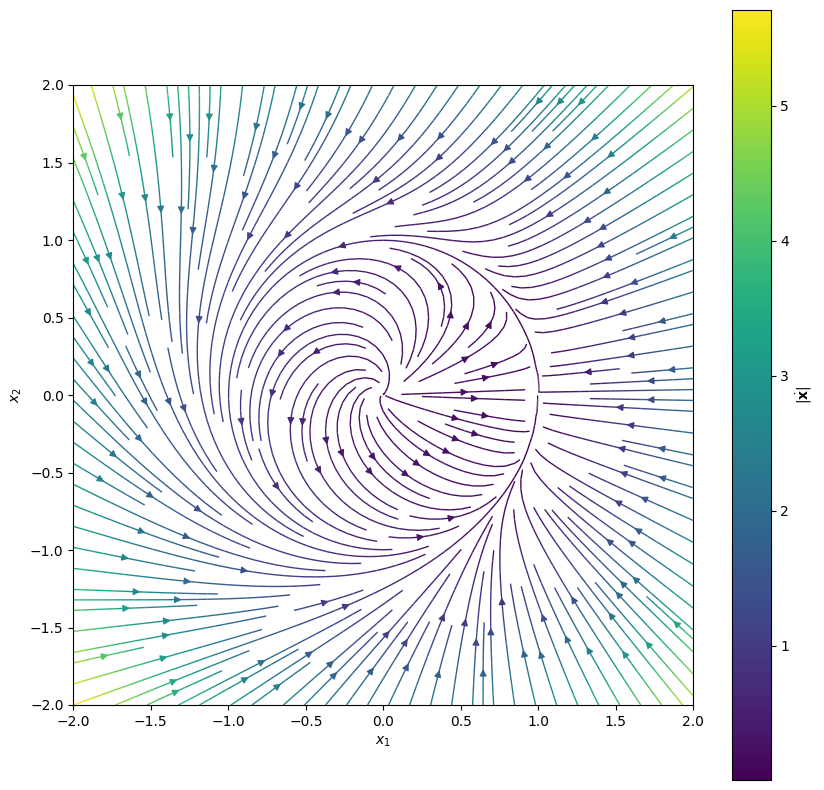

In [17]:
# function that given the initial state
# and a simulation time plots the system trajectory
def plot_trajectory(x, sim_time):
    # simulate the system from the given state
    traj = simulate(x, sim_time)

    # plot a blue dot for the initial conditions
    label = r"$\mathbf{x}(0)=[%.2f,%.2f]^T$" % (x[0], x[1])
    plt.scatter(*x, s=50, c="b", zorder=3, label=label)

    # plot a red curve for the trajectory
    label = r"$\mathbf{x}(t)$"
    plt.plot(traj[0, :], traj[1, :], label=label, c="r")

initial_conditions = [-1, -1]  # modify here
sim_time = 1  # modify here

# initialize plot and make it big enough
plt.figure(figsize=(10, 10))

# plot the phase portrait of the 2d system
plot_2d_phase_portrait(
    dynamics, x1lim=[-2, 2], x2lim=[-2, 2], linewidth=1, density=2
)

# # superimpose the trajectory to the phase portrait
# plot_trajectory(initial_conditions, sim_time)

# # add legend
# plt.legend(loc=1)